**AIM : Implement Decision Tree Classifier**

In [26]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import recall_score

Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny',
'Overcast',
'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast',
'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'
,'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [27]:
le = preprocessing.LabelEncoder()
Olk_encd = le.fit_transform(Outlook)
Olk_name_maping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Olk_name_maping)
Temp_encd = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encd = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encd = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encd = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print()
print()
print("Weather:" ,Olk_encd)
print("Temerature:" ,Temp_encd)
print("Humidity:" ,Humidity_encd)
print("Wind:" ,Wind_encd)
print("Play:" ,Play_encd)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}


Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [28]:
features=list(zip(Olk_encd,Temp_encd,Humidity_encd,Wind_encd))
print("Features : \n",features)

Features : 
 [(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


In [29]:
x_train, x_test, y_train, y_test = train_test_split(features,Play_encd , test_size=0.3, random_state=100)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[(2, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (1, 1, 0, 0), (1, 2, 1, 1), (1, 2, 0, 0), (2, 2, 0, 0), (2, 2, 0, 1), (1, 0, 1, 0)]
[(0, 2, 0, 1), (0, 1, 1, 0), (2, 0, 1, 1), (1, 1, 0, 1), (2, 2, 1, 0)]
[1 1 1 0 1 0 1 0 1]
[1 1 0 0 1]


In [30]:
clfr = DecisionTreeClassifier(criterion = "entropy", random_state = 100)

clfr = clfr.fit(x_train,y_train)
y_pred = clfr.predict(x_test)
print(y_pred)

[1 1 1 0 1]


In [31]:
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

[[1 1]
 [0 3]]
precision: 0.75
recall: 1.0


[Text(0.5, 0.9, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.3333333333333333, 0.7, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.16666666666666666, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.5, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

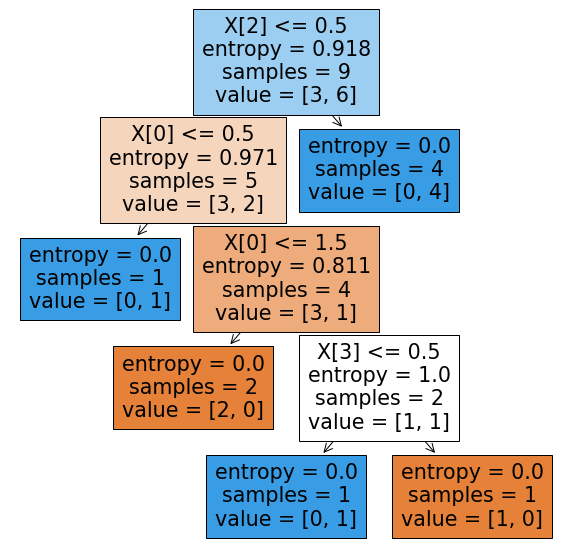

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clfr,filled=True)

**2_DT_Iris**

In [33]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as numpy
iris = datasets.load_iris()
print("Features:",iris.feature_names)
print("Labels:",iris.target_names)
print("\nData shape: ",iris.data.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']

Data shape:  (150, 4)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target , test_size=0.3, random_state=179)

clfr = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clfr = clfr.fit(X_train,y_train)
y_pred = clfr.predict(X_test)
print(y_pred)

[0 2 1 2 0 2 1 1 0 2 2 2 0 0 0 2 0 1 0 2 0 1 2 2 0 1 1 1 1 2 0 0 0 1 1 2 2
 2 2 1 2 1 0 1 1]


In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


[Text(0.375, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'X[3] <= 1.65\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(0.25, 0.5, 'X[2] <= 4.95\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.5, 'X[0] <= 5.95\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.3, 'X[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

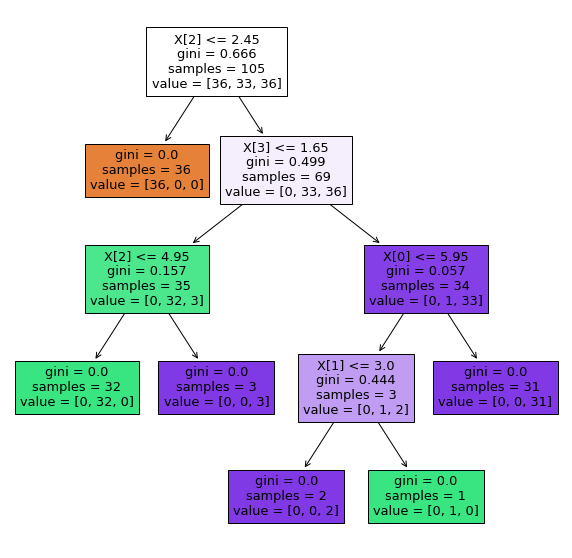

In [36]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clfr,filled=True)